In [33]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV
#from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.decomposition import PCA 

In [34]:
df=pd.read_excel('default of credit card clients.xls',header=1)

In [35]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [36]:
#Changing the column name 'default payment next month' to 'DEFAULT'
df.rename({'default payment next month':'DEFAULT'},axis='columns',inplace=True)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [37]:
#axis=0 removes rows while axis=1 removes columns
df.drop('ID',axis=1,inplace=True)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [38]:
#Cgecking out the datatypes of each column
df.dtypes

LIMIT_BAL    int64
SEX          int64
EDUCATION    int64
MARRIAGE     int64
AGE          int64
PAY_0        int64
PAY_2        int64
PAY_3        int64
PAY_4        int64
PAY_5        int64
PAY_6        int64
BILL_AMT1    int64
BILL_AMT2    int64
BILL_AMT3    int64
BILL_AMT4    int64
BILL_AMT5    int64
BILL_AMT6    int64
PAY_AMT1     int64
PAY_AMT2     int64
PAY_AMT3     int64
PAY_AMT4     int64
PAY_AMT5     int64
PAY_AMT6     int64
DEFAULT      int64
dtype: object

In [39]:
df['SEX'].unique()

array([2, 1], dtype=int64)

In [40]:
df['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6, 0], dtype=int64)

In [41]:
df['MARRIAGE'].unique()

array([1, 2, 3, 0], dtype=int64)

In [42]:
len(df.loc[(df['EDUCATION']==0) | (df['MARRIAGE']==0)])

68

In [43]:
len(df)

30000

In [44]:
df_no_missing=(df.loc[(df['EDUCATION']!=0) & (df['MARRIAGE']!=0)])

In [45]:
len(df_no_missing)

29932

In [46]:
df_no_missing['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6], dtype=int64)

In [47]:
df_no_missing['MARRIAGE'].unique()

array([1, 2, 3], dtype=int64)

In [48]:
#SVMs are great with smaller datasets. 
#This dataset is not huge but is still big enough to take a long time with cross validation
df_no_default=df_no_missing[df_no_missing['DEFAULT']==0]
df_default=df_no_missing[df_no_missing['DEFAULT']==1]

In [49]:
df_no_default_downsampled=df_no_default.sample(replace=False,n=1000,random_state=42)
df_default_downsampled=df_default.sample(replace=False,n=1000,random_state=42)

In [50]:
len(df_no_default_downsampled)

1000

In [51]:
len(df_default_downsampled)

1000

In [52]:
#Merging the two datasets in a single dataframe and printing it's length to make sure everything is alright.
df_downsample=pd.concat([df_no_default_downsampled,df_default_downsampled])
len(df_downsample)

2000

In [53]:
#We will have X which has the data we want to use to make predictions & y which has the data we want to predict
X=df_downsample.drop('DEFAULT',axis=1).copy()
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
641,130000,2,3,1,28,0,0,0,0,-2,...,50000,0,0,0,2500,1000,0,0,0,0
4678,170000,1,3,1,29,0,0,0,0,0,...,172307,35234,32869,33862,7200,7500,1200,1200,1500,1300
16004,180000,2,2,1,29,0,0,0,0,0,...,26310,26662,26166,26176,1800,1800,1500,1056,950,1000
22974,210000,2,2,2,32,-2,-2,-2,-2,-2,...,410,0,0,0,979,412,0,0,0,0
17535,190000,2,3,1,45,0,0,0,0,0,...,80548,81778,83082,84811,3300,3331,3359,2663,2751,3000


In [54]:
y=df_downsample['DEFAULT'].copy()
y.head()

641      0
4678     0
16004    0
22974    0
17535    0
Name: DEFAULT, dtype: int64

In [55]:
#We need to continue formatting X so that it is suitable for making a Support Vector Machine
X_encoded=pd.get_dummies(X,columns=['SEX','EDUCATION','MARRIAGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6'])
X_encoded.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_5_7,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7
641,130000,28,100143,50456,50000,0,0,0,2500,1000,...,0,1,0,0,0,0,0,0,0,0
4678,170000,29,165027,168990,172307,35234,32869,33862,7200,7500,...,0,0,0,1,0,0,0,0,0,0
16004,180000,29,25781,26000,26310,26662,26166,26176,1800,1800,...,0,0,0,1,0,0,0,0,0,0
22974,210000,32,355,975,410,0,0,0,979,412,...,0,1,0,0,0,0,0,0,0,0
17535,190000,45,76433,78472,80548,81778,83082,84811,3300,3331,...,0,0,0,1,0,0,0,0,0,0


In [56]:
#The Radical Basis Function(RBF) that we are using with our svm assumes that our data is centered and scaled
#This means each column should have a mean of 0 and a standard deviation of 1
#We are splitting and then scaling the data
#This so because we want to avoid Data Leakage
#Data Leakage occurs when the information about the training set corrupts the testing set
X_train,X_test,y_train,y_test=train_test_split(X_encoded,y,random_state=42)
X_train_scaled=scale(X_train)
X_test_scaled=scale(X_test)

In [57]:
#Building an SVM
#We call a support vector classifier(SVC)
#This makes an untrained shell of a support vector classifier
#We are saving that shell as clf_svm
#Next we are fitting it or training it on the training data

In [58]:
clf_svm=SVC(random_state=42)
clf_svm.fit(X_train_scaled,y_train)

SVC(random_state=42)

In [59]:
#Now that we've built a SVM for classification, we'll test it on the testing dataset
#Then we'll plogt a confusion matrix

C:\Users\Vaishnavi Tiwari\abc\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


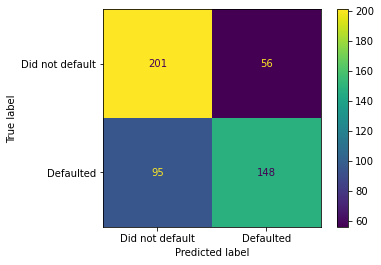

In [60]:
plot_confusion_matrix(clf_svm,X_test_scaled,y_test,values_format='d',display_labels={"Did not default","Defaulted"})

In [61]:
param_grid={'C': [0.5,1,10,100],
     'gamma': ['scale',1,0.1,0.001,0.0001],
     'kernel': ['rbf']}

optimal_params=GridSearchCV(
    SVC(),
    param_grid,
    cv=5,
    scoring='accuracy',
    verbose=0
)
optimal_params.fit(X_train_scaled,y_train)
print(optimal_params.best_params_)

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}


C:\Users\Vaishnavi Tiwari\abc\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


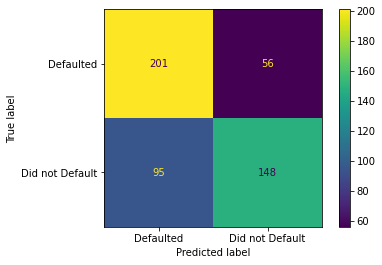

In [62]:
clf_svc=SVC(random_state=42,C=100,gamma=0.001)
clf_svc.fit(X_train_scaled,y_train)
plot_confusion_matrix(clf_svm,X_test_scaled,y_test,values_format='d',display_labels={"Did not Default","Defaulted"})